In [23]:
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from svg.path import parse_path



In [24]:
def extract_points_from_svg(file_path, num_points=50000):
    """
    Extract points from the SVG file's path.
    """
    # Parse the SVG file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Extract the path data
    svg_path = root.find('.//{http://www.w3.org/2000/svg}path').get('d')
    path = parse_path(svg_path)

    # Sample points from the path
    points = np.array([path.point(i / (num_points - 1)) for i in range(num_points)])
    x, y = points.real, points.imag

    return x, y

In [25]:
def fourier_transform(x, y):

    complex_numbers = x + 1j * y
    fourier_transform = np.fft.fft(complex_numbers)

    return fourier_transform

def plot_fourier_reconstruction(fourier_coeffs, num_points = 50000):
    t = np.linspace(0, 2 * np.pi, num_points)
    reconstruction = np.zeros(num_points, dtype=complex)

    for n in range(len(fourier_coeffs)):
        reconstruction += fourier_coeffs[n] * np.exp(1j * n * t)

    plt.figure(figsize=(8, 8))
    plt.plot(reconstruction.real, reconstruction.imag)
    plt.title("Fourier Transform Reconstruction of SVG")
    plt.axis('equal')
    plt.show()

In [26]:
svg_content = '''
<svg width="100" height="100" xmlns="http://www.w3.org/2000/svg">
  <path d="M10 80 L50 10 L90 80 Z" stroke="black" stroke-width="2" fill="none"/>
</svg>
'''

# Specify the file name
file_name = 'triangle.svg'

# Write the SVG content to the file
with open(file_name, 'w') as file:
    file.write(svg_content)

print(f'SVG file saved as {file_name}')


SVG file saved as triangle.svg


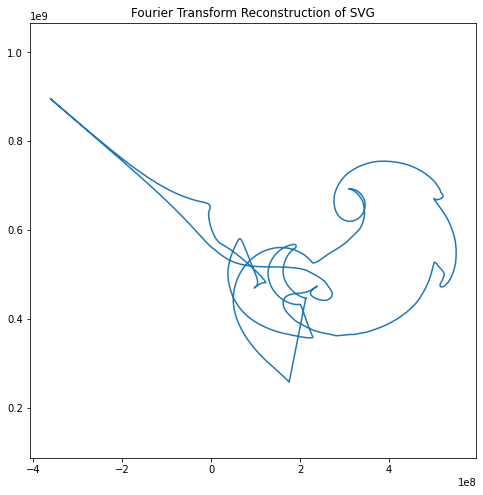

In [27]:
# path to svg

svg_file_path = 'Treble_clef_1.svg'

x, y = extract_points_from_svg(svg_file_path)

fourier_coeffs = fourier_transform(x, y)

plot_fourier_reconstruction(fourier_coeffs)